Gradient Descent (Gradienten-Abstieg):

$x = x - \eta \cdot \nabla f(x)$  
$f(x)$ ist die Funktion (z.B. Fehlerfunktion)  
$x$ ist der Parameter (z.B. Gewicht im NN)  

$f(x) = 100 \cdot (x_0^2 - x_1)^2 + (x_0 -1)^2$  

$\nabla f(x_0) = 2 \cdot (200 \cdot x_0 \cdot (x_0^2 - x_1) + x_0 - 1)$  
$\nabla f(x_1) = -200 \cdot (x_0^2 - x_1)$

In [2]:
# Rosenbrock Funktion
def f(x0, x1):
    return 100 * (x0**2 - x1)**2 + (x0 - 1)**2

def f_prime_x0(x0, x1):
    return 2 * (200 * x0 * (x0**2 - x1) + x0 - 1)

def f_prime_x1(x0, x1):
    return -200 * (x0**2 - x1)

# Globales Minimum bei x = (1, 1)
print("Minimum: ", f(1, 1))
print("Starte bei: ", f(-1, -1))

Minimum:  0
Starte bei:  404


<IPython.core.display.Javascript object>


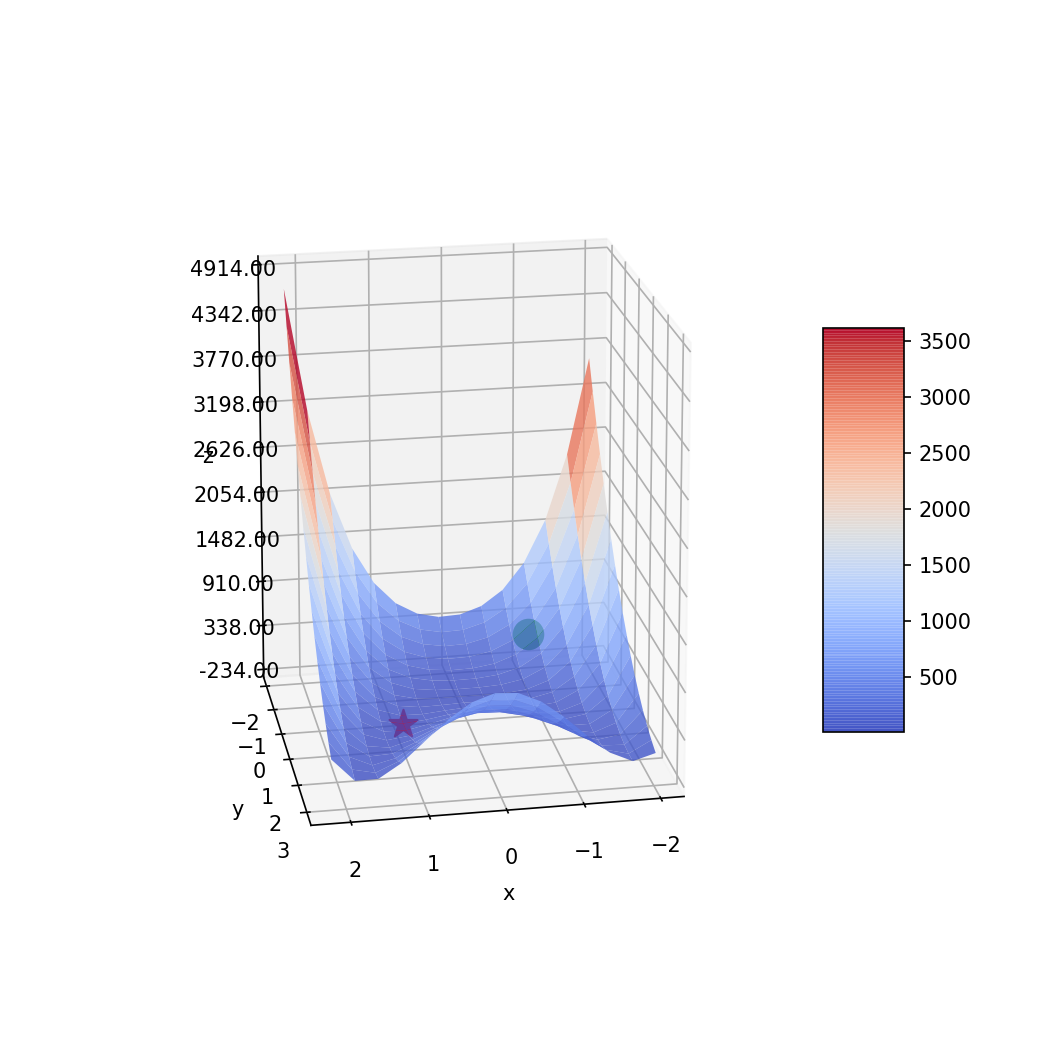

In [3]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')

s = 0.3
X = np.arange(-2, 2.+s, s)
Y = np.arange(-2, 3.+s, s)
    
#Create the mesh grid(s) for all X/Y combos.
X, Y = np.meshgrid(X, Y)
#Rosenbrock function w/ two parameters using numpy Arrays
Z = f(X, Y)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, alpha=0.8)
# Global minimum
ax.scatter(1, 1, f(1, 1), color="red", marker="*", s=200)
# Starting point
ax.scatter(-1, -1, f(-1, -1), color="green", marker="o", s=200)
 
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [5]:
eta = 1/1000

x0 = -1
x1 = -1
y = f(x0, x0)

stop_conv = 1e-6
stop_div = 1e+6
stop_iter = 1e4
it = 0

downhill_points = []

while y > stop_conv and y < stop_div and it < stop_iter:
    x0 = x0 - eta * f_prime_x0(x0, x1)
    x1 = x1 - eta * f_prime_x1(x0, x1)
    
    it += 1
    fx = f(x0, x1)
    if it % 100 == 0:
        downhill_points.append([x0, x1])
        
print("Solution: ", fx)
print("X0 = ", x0)
print("X1 = ", x1)

Solution:  7.781537210296056e-06
X0 =  0.9972124894967727
X1 =  0.9944221085294753


<IPython.core.display.Javascript object>


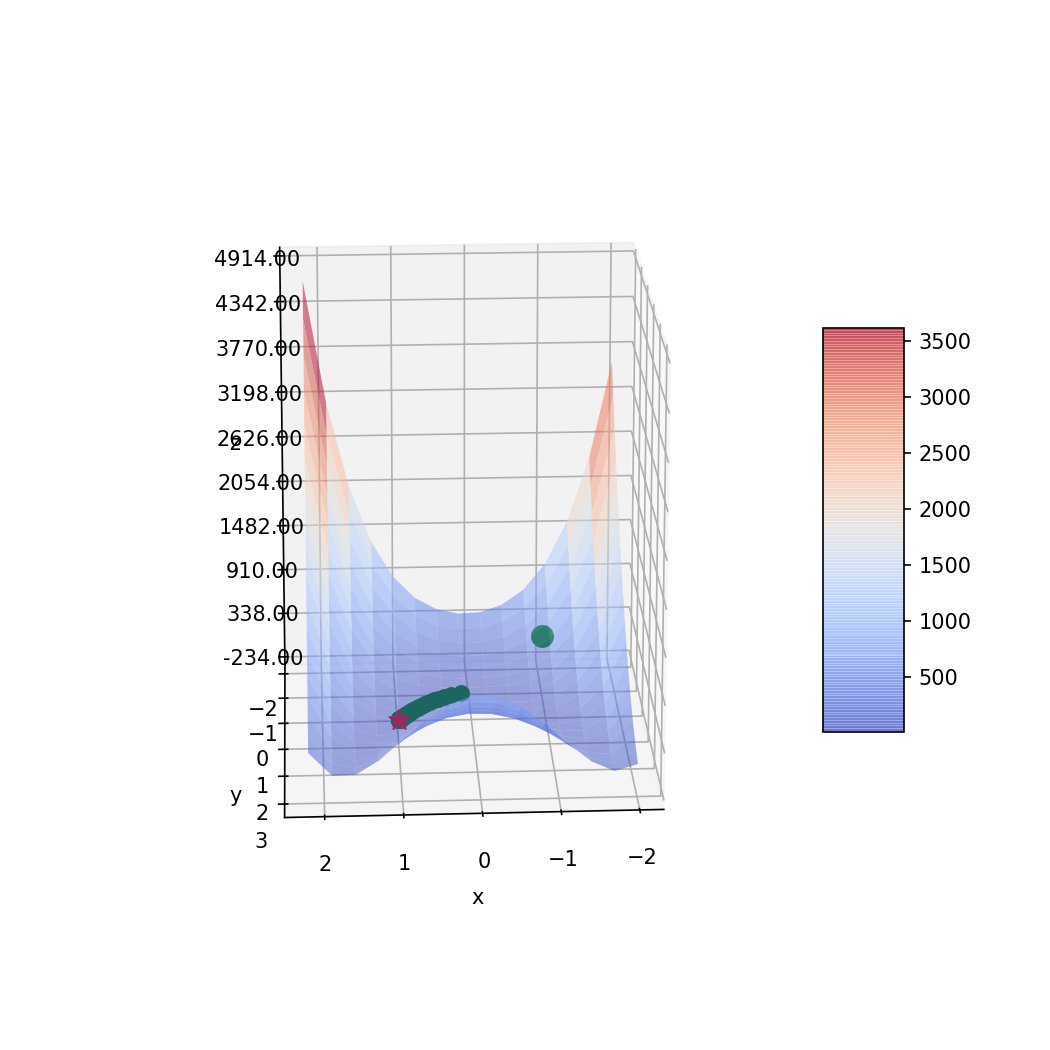

In [6]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')

eps = 0
s = 0.3
X = np.arange(-2, 2.+s, s)
Y = np.arange(-2, 3.+s, s)
    
#Create the mesh grid(s) for all X/Y combos.
X, Y = np.meshgrid(X, Y)
#Rosenbrock function w/ two parameters using numpy Arrays
Z = f(X, Y)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, alpha=0.5)
# Global minimum
ax.scatter(1, 1, f(1, 1)+eps, color="red", marker="*", s=100)
# Starting point
ax.scatter(-1, -1, f(-1, -1)+eps, color="green", marker="o", s=100)

# Plot Updated Points
for (x0, x1) in downhill_points:
    ax.scatter(x0, x1, f(x0, x1)+eps, color="green", marker="o", s=50)
 
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [7]:
for eta in [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]:
    x0 = -1
    x1 = -1
    y = f(x0, x0)

    stop_conv = 1e-6
    stop_div = 1e+6
    stop_iter = 1e4
    it = 0

    while y > stop_conv and y < stop_div and it < stop_iter:
        x0 = x0 - eta * f_prime_x0(x0, x1)
        x1 = x1 - eta * f_prime_x1(x0, x1)

        it += 1
        fx = f(x0, x1)
    
    print("Eta = ", format(eta, 'e'))
    print("Solution: ", fx)
    print("X0 = ", x0)
    print("X1 = ", x1, "\n")

Eta =  1.000000e-07
Solution:  110.60537802270836
X0 =  -0.5668778235959878
X1 =  -0.7186027623933521 

Eta =  1.000000e-06
Solution:  2.292764605684254
X0 =  -0.14234590322685017
X1 =  -0.07912629726464393 

Eta =  1.000000e-05
Solution:  0.8774057351704224
X0 =  0.06335476549968617
X1 =  0.0030066527501386494 

Eta =  1.000000e-04
Solution:  0.115544983011484
X0 =  0.6604692760712123
X1 =  0.43459525544950495 

Eta =  1.000000e-03
Solution:  7.781537210296056e-06
X0 =  0.9972124894967727
X1 =  0.9944221085294753 

